In [10]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

NS_80 = "./../logs/hallmark_notch_signaling/"
RAN_32 = "./../logs/random_32s/"

In [11]:
allSets=[]
maxValues = pd.DataFrame(index=range(3,32), columns = ["Genes", "Accuracy"])
minValues = pd.DataFrame(index=range(3,32), columns = ["Genes", "Accuracy"])
avgValues = pd.DataFrame(index=range(3,32), columns = ["Genes", "Accuracy"])
steValues =  pd.DataFrame(index=range(3,32), columns = ["Accuracy"])
for i in range(3,32):
    s = pd.DataFrame( columns = ["Genes", "Accuracy"])
    count = 0
    with open(NS_80 + 'hallmark_notch_signaling_'+str(i)+'_gene_accuracy.txt' , "r") as f:
        for line in f:
            (key, val) = line.split("\t")
            val =val.replace("\n", "")
            key = key.replace(",)",")")
            s.loc[count,"Genes"] = key
            s.loc[count,"Accuracy"] = val
            count += 1
        allSets.append(s)
        #Add MAX
        maxValues.loc[i,"Genes"]= s.max()["Genes"]
        maxValues.loc[i,"Accuracy"] = float(s.max()["Accuracy"])
        #Add Min
        minValues.loc[i,"Genes"]= s.min()["Genes"]
        minValues.loc[i,"Accuracy"] = float(s.min()["Accuracy"])
        #Add Std
        vals = [float(x) for x in s["Accuracy"]]
        steValues.loc[i,"Accuracy"] =stats.sem(vals)
        #Avg
        avgValues.loc[i,"Accuracy"] = np.mean(vals)

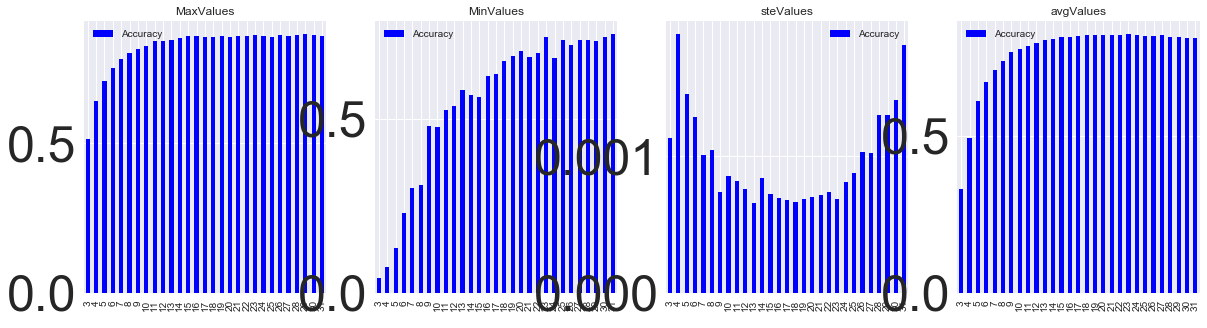

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(20,5))
maxValues.plot(x= maxValues.index.values , y="Accuracy",color="blue",ax=axes[0],title="MaxValues",kind="bar")
minValues.plot(x= minValues.index.values , y="Accuracy",color="blue",ax=axes[1],title="MinValues",kind="bar")
steValues.plot(x= steValues.index.values , y="Accuracy",color="blue",ax=axes[2],title="steValues",kind="bar")
avgValues.plot(x= avgValues.index.values , y="Accuracy",color="blue",ax=axes[3],title="avgValues",kind="bar")


plt.show()

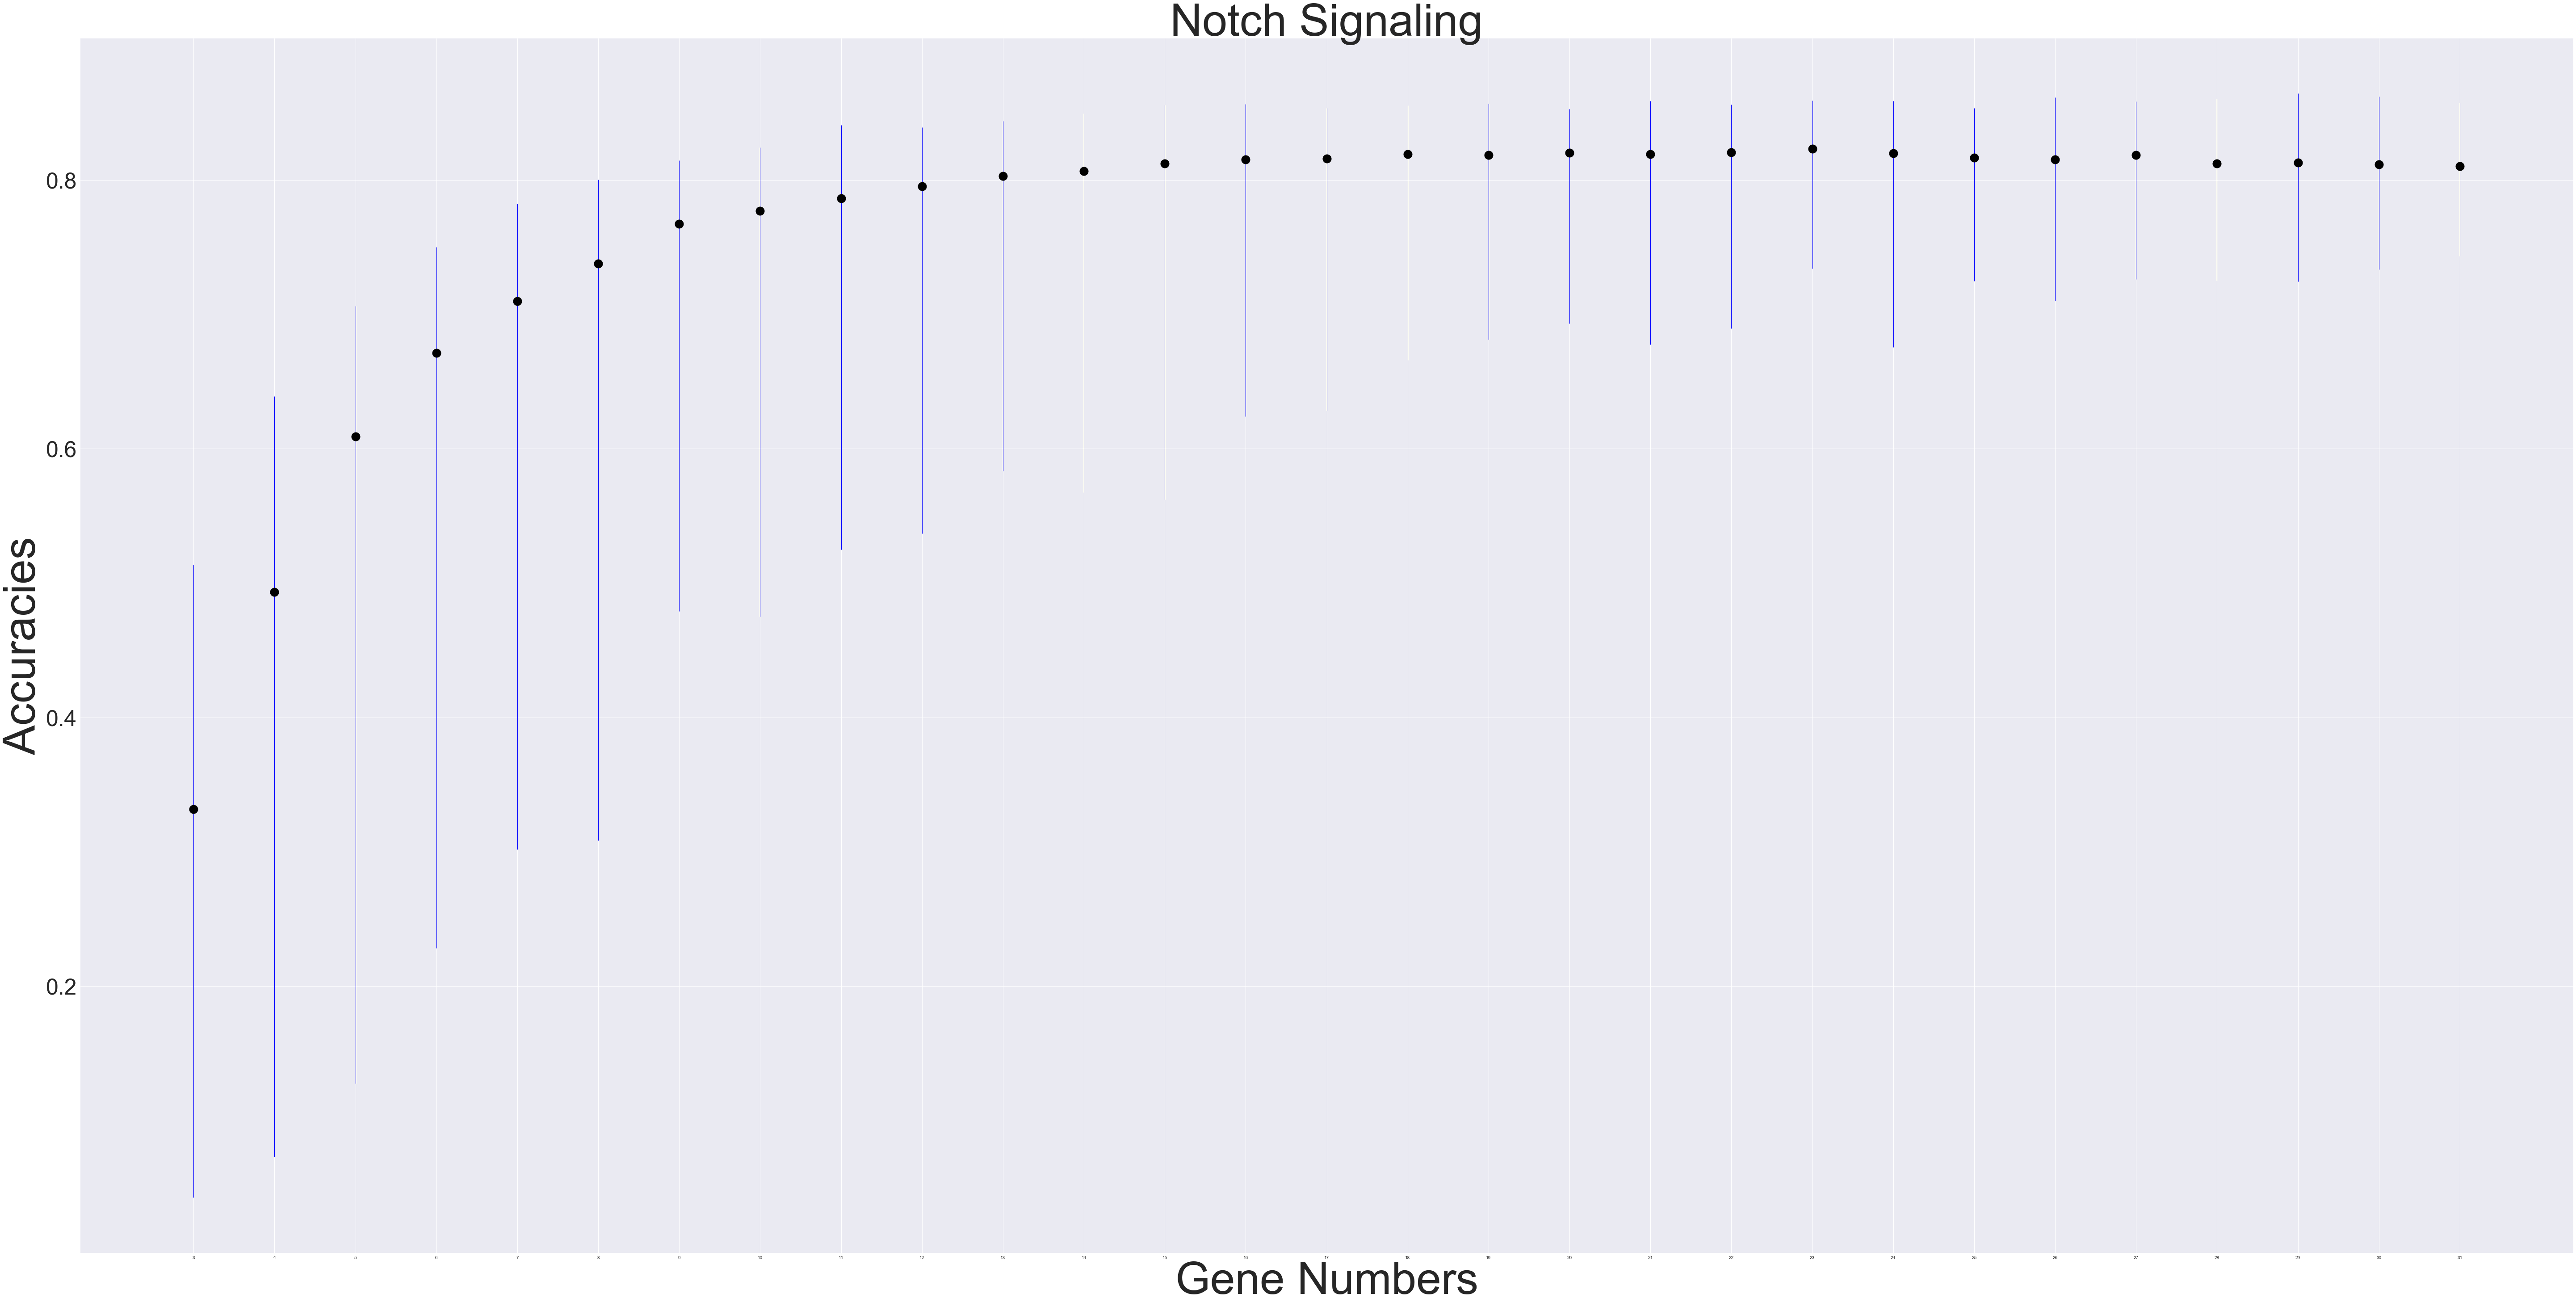

In [13]:
plt.figure(figsize=(100,50))
plt.errorbar(range(3,32), avgValues["Accuracy"].values, steValues["Accuracy"].values, fmt='ok', lw=3, \
            markersize=20)
plt.errorbar(range(3,32), avgValues["Accuracy"].values, [avgValues["Accuracy"].values - minValues["Accuracy"].values, \
                                                        maxValues["Accuracy"].values - avgValues["Accuracy"].values], \
                                                        fmt = '.k', ecolor = 'blue', lw=1)

plt.rc('ytick', labelsize=50)    # fontsize of the tick labels
plt.xticks(range(3,32))
plt.xlabel("Gene Numbers",fontsize=100)
plt.ylabel("Accuracies",fontsize=100)
plt.title("Notch Signaling",fontsize=100)

plt.show()



In [14]:
avg_total = []
ste_total = []
count = 1
for i in range(1,11):
    avg_set = []
    ste_set = []
    for j in range(3,32):
        vals = []
        with open(RAN_32 + "random_32_"+ str(i) + "/random_32_" + str(i) + "_" + str(j) + "_gene_accuracy.txt") as f:
            for line in f:
                vals.append(float(line.split("\t")[1]))
        avg_set.append(np.mean(vals))
        ste_set.append(stats.sem(vals))
    avg_total.append(avg_set)
    ste_total.append(ste_set)
    


In [6]:
# final_avgs = []
# final_ste = []

# for combo in range(29):
#     avg_vals = []
#     ste_vals = []
#     for s in range(10):# s is set
#         avg_vals.append(avg_total[s][combo])
#         ste_vals.append(ste_total[s][combo])
#     final_avgs.append(np.mean(avg_vals))
#     final_ste.append(stats.sem(ste_vals))
    

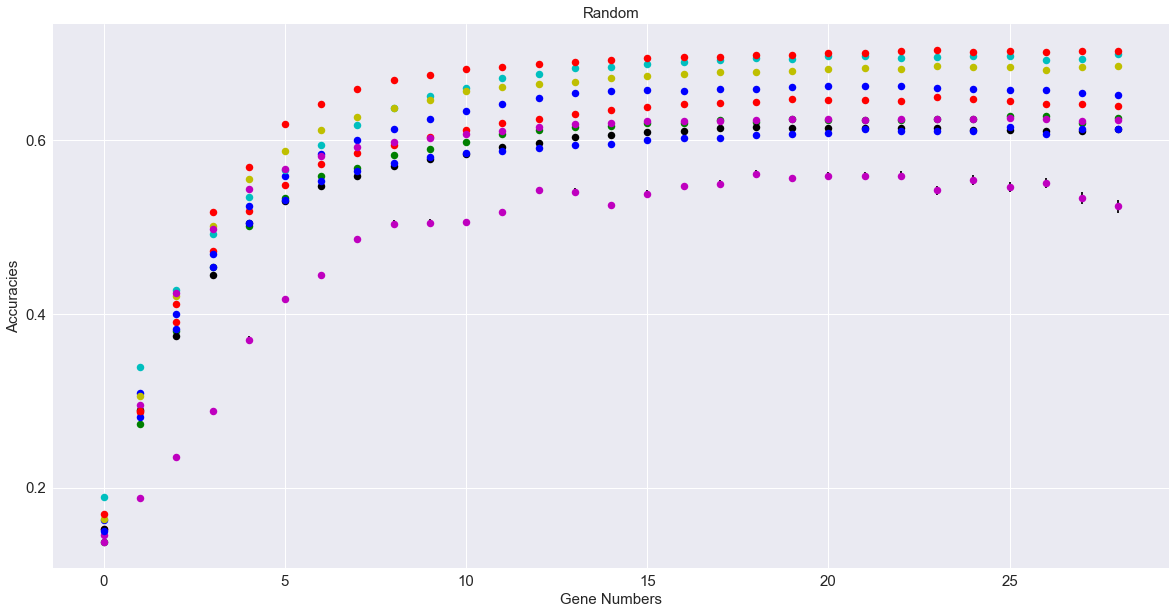

In [15]:
x = np.arange(0,29)
plt.figure(figsize=(20,10))

colors = ["r","b","g","c","m","y","k","b","m","r"]

for i in range(0,10):
    
    plt.errorbar(num, avg_total[i], ste_total[i], linestyle='None', marker='.', markersize=15, color=colors[i],ecolor="black")

plt.xlabel("Gene Numbers",fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Accuracies",fontsize=15)
plt.title("Random",fontsize=15)

plt.show()

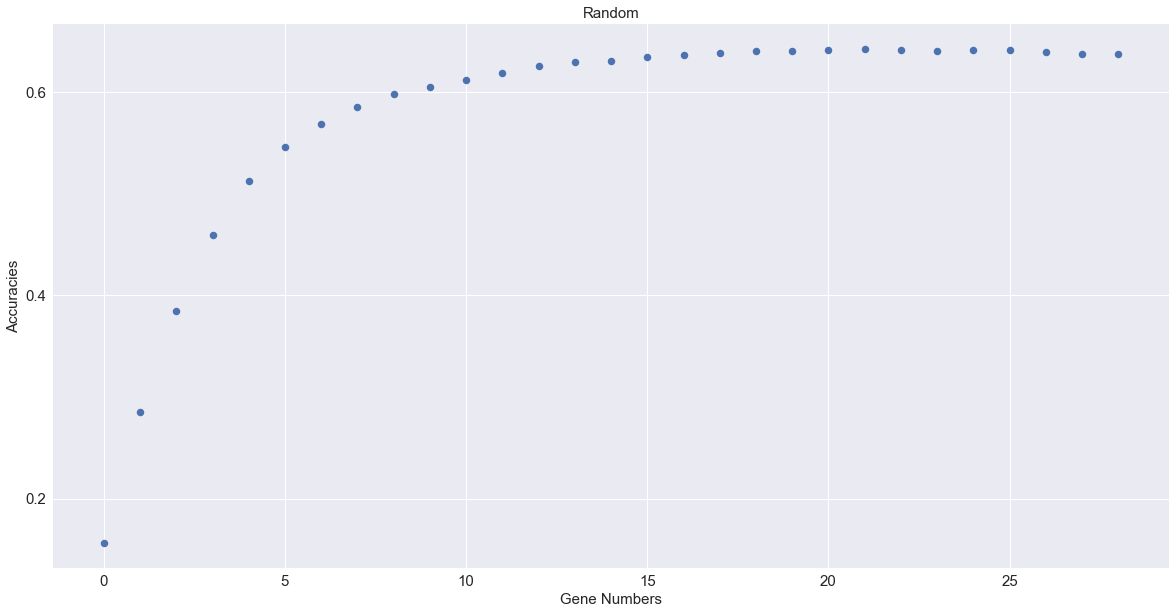

In [8]:
num = range(0,29)
num = np.asarray(num)
avgR =np.asarray(final_avgs)
steR = np.asarray(final_ste)

plt.figure(figsize=(20,10))
plt.errorbar(num, avgR, steR, linestyle='None', marker='.', markersize=15, ecolor="black")
avgValues.plot(x= avgValues.index.values , y="Accuracy",yerr=steValues,color="black",ax=axes[0],title="avgValues",markersize=10,linestyle='None',marker='.',markerfacecolor='blue')
plt.xlabel("Gene Numbers",fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Accuracies",fontsize=15)
plt.title("Random",fontsize=15)
plt.show()


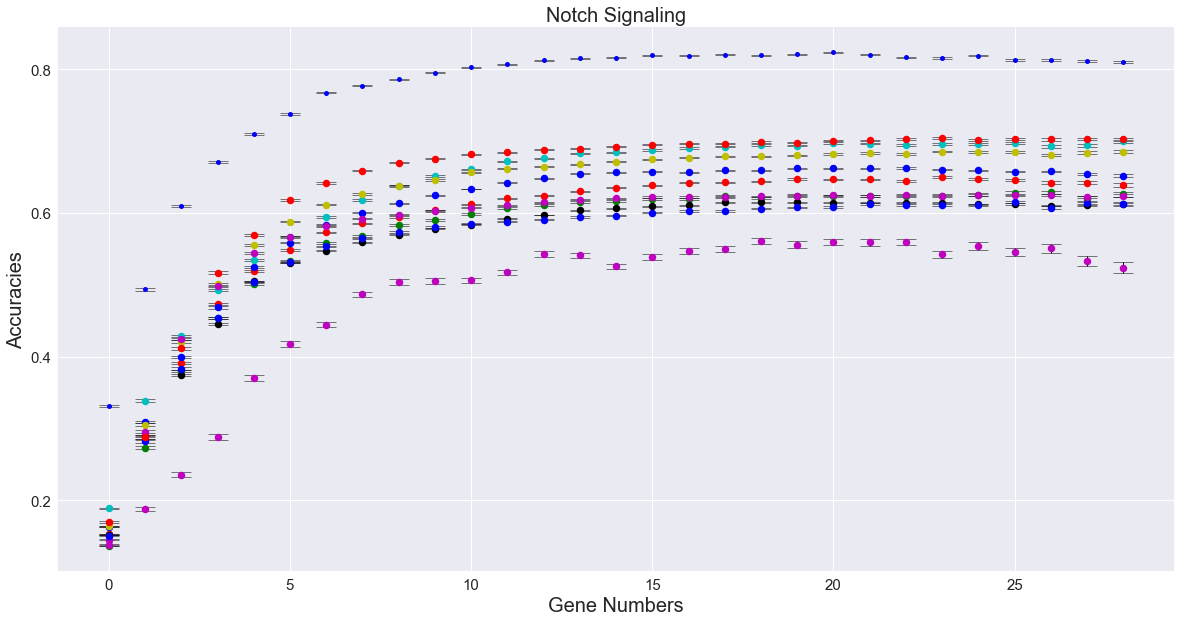

In [17]:
plt.figure(figsize=(20,10))
avg = avgValues["Accuracy"].values
ste = steValues["Accuracy"].values
maxNS = maxValues["Accuracy"].values
minNS = minValues["Accuracy"].values
(_, caps, _) = plt.errorbar(num, avg, ste, fmt='ok', lw=1,\
            markersize=5,markerfacecolor='blue', capsize=10)

colors = ["r","b","g","c","m","y","k","b","m","r"]

for i in range(0,10):
    
    (_, capsR, _) = plt.errorbar(num, avg_total[i], ste_total[i], linestyle='None', marker='.', markersize=15, color=colors[i],ecolor="black",lw=1, capsize=10)

    for cap in capsR:
        cap.set_color('black')
        cap.set_markeredgewidth(.5)


for cap in caps:
    cap.set_color('black')
    
    cap.set_markeredgewidth(.5)


plt.xlabel("Gene Numbers",fontsize=20)
plt.ylabel("Accuracies",fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title("Notch Signaling",fontsize=20)

plt.show()